In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats
#from matplotlib import rcParams

# encoding=utf8  
import sys
reload(sys)  
sys.setdefaultencoding('utf8')

Frame = pd.read_excel('01 sitios.xlsx')
writer = pd.ExcelWriter('01 output.xlsx')


In [2]:
Frame

,Sitio,Punto,Pendiente,Precipitacion,Temperatura,Evaporacion
0,1,1,15,1217.025,27.020,1378.000
1,1,2,35,1217.025,27.020,1378.000
2,2,1,20,4307.940,25.125,1214.040
3,2,2,15,4307.940,25.125,1214.040
4,3,1,10,1431.025,28.300,1662.025
5,3,2,15,1431.025,28.300,1662.025
6,4,1,28,1380.520,26.825,1662.025
7,4,2,2,1380.520,26.825,1662.025
8,5,1,2,1380.520,26.825,1662.025
9,5,2,1,1380.520,26.825,1662.025


In [3]:
Frame.columns=["Sitio", 
               "Punto", 
               "Pendiente", 
               u"Precipitación Prom. Men. Multi-Anual(mm)", 
               u"Temperatura ºC", 
               u"Evaporación Prom. Men. Multi-Anual(mm)"]

Columnas = list(Frame)
aux = []
for i in range(4):
    aux0 = [Columnas[2+i], Frame.iloc[:,2+i].mean(), Frame.iloc[:,2+i].std()]
    print aux0
    aux.append(aux0)
    
frame_export = pd.DataFrame(aux)
frame_export.columns = ["Col", "Mean", "STD"]

frame_export.to_excel(writer, "01 sitios")
writer.save()
writer.close()

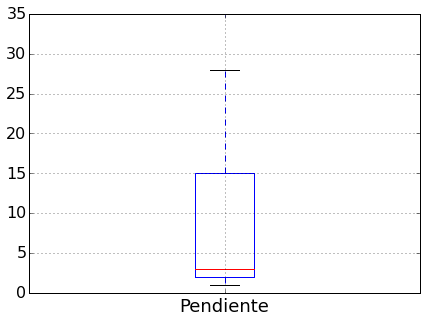

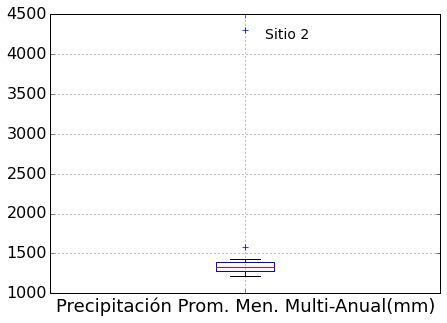

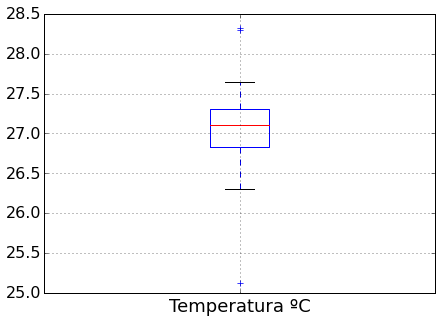

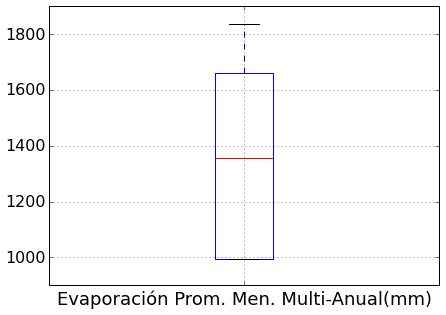

In [4]:
labelsize = 16
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

for i in range(4):
    fig=figure( figsize=(7,5))
    Frame.boxplot(column=Columnas[2+i], fontsize=18)
    if(i==1):
        plt.text(1.05, 4200, "Sitio 2", fontsize=14)
    
    fig.savefig("01 sitios fig/"+str(Columnas[2+i])+".png")
    

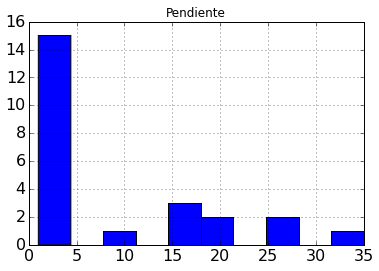

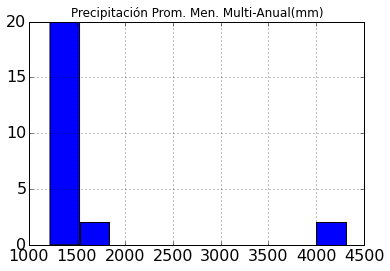

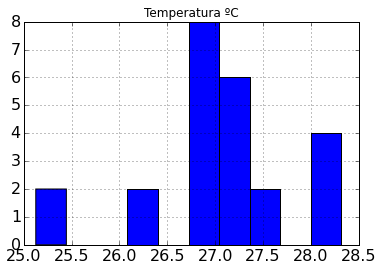

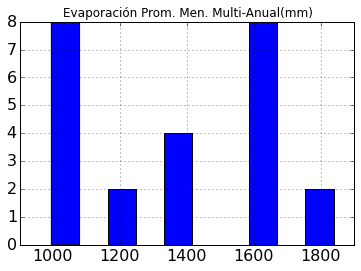

In [5]:
X = Frame.iloc[:,2:6]

Columnas = list(X)

for i in range(4):
    print str(Columnas[i])
    fig = figure()
    pd.DataFrame.hist(X, column=Columnas[i])
    aux = stats.normaltest(X.iloc[:,i])
    print "\t", aux
    if(aux[1]>0.05):
        print "\tVariable Normal"
    else:
        print "\tVariable NO Normal"
    aux = stats.shapiro(X.iloc[:,i])
    print "\t", aux
    

In [8]:
from sklearn.decomposition import PCA

In [9]:
Frame.iloc[:,2:6]

,Pendiente,Precipitacion,Temperatura,Evaporacion
0,15,1217.025,27.020,1378.000
1,35,1217.025,27.020,1378.000
2,20,4307.940,25.125,1214.040
3,15,4307.940,25.125,1214.040
4,10,1431.025,28.300,1662.025
5,15,1431.025,28.300,1662.025
6,28,1380.520,26.825,1662.025
7,2,1380.520,26.825,1662.025
8,2,1380.520,26.825,1662.025
9,1,1380.520,26.825,1662.025


In [9]:
pca = PCA(n_components=4)

In [10]:
pca.fit(Frame.iloc[:,2:6])

PCA(copy=True, n_components=4, whiten=False)

In [11]:
pca.explained_variance_

array([  6.82315730e+05,   9.53261154e+04,   8.68685383e+01,
         3.46110941e-01])

In [12]:
pca.explained_variance_ratio_

array([  8.77318034e-01,   1.22569826e-01,   1.11695117e-04,
         4.45027656e-07])

In [13]:
X = Frame.iloc[:,2:6]- Frame.iloc[:,2:6].mean()

In [14]:
pca = PCA(n_components=4)
pca.fit(X)
pca.explained_variance_ratio_

array([  8.77318034e-01,   1.22569826e-01,   1.11695117e-04,
         4.45027656e-07])

In [15]:
X_transf = pca.fit_transform(X)

array([  8.77318034e-01,   1.22569826e-01,   1.11695117e-04,
         4.45027656e-07])

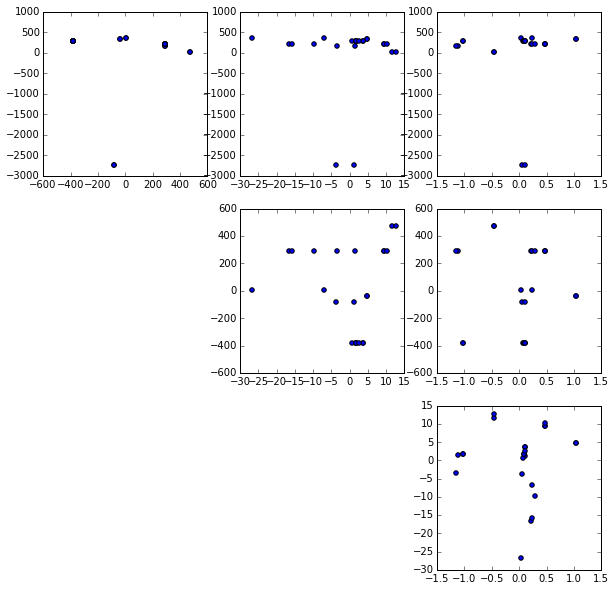

In [16]:
fig = figure(figsize=(10,10))

ax0 = fig.add_subplot(331)
ax0.scatter( X_transf[:,1], X_transf[:,0])

ax1 = fig.add_subplot(332)
ax1.scatter( X_transf[:,2], X_transf[:,0])

ax2 = fig.add_subplot(333)
ax2.scatter( X_transf[:,3], X_transf[:,0])

ax3 = fig.add_subplot(335)
ax3.scatter( X_transf[:,2], X_transf[:,1])

ax4 = fig.add_subplot(336)
ax4.scatter( X_transf[:,3], X_transf[:,1])

ax5 = fig.add_subplot(339)
ax5.scatter( X_transf[:,3], X_transf[:,2])

pca.explained_variance_ratio_